<a href="https://colab.research.google.com/github/Bagaskz/penerapan-EDA-pada-2-data-set/blob/main/2318075_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. upload file data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv to Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv
Saving garisKemiskinan (1).csv to garisKemiskinan (1).csv


2. import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3. Membaca datasheet

In [ ]:


# 1. Membaca dataset Garis Kemiskinan (default delimiter ',')
df_garis = pd.read_csv('garisKemiskinan (1).csv')

# 2. Membaca dataset Klasifikasi Tingkat Kemiskinan
#    >>> Tambahkan 'sep=';'' karena file ini menggunakan titik koma sebagai pemisah.
#    >>> Pastikan nama file sesuai: 'Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv'
df_tingkat = pd.read_csv('Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv', sep=';')

# Menampilkan data teratas untuk verifikasi
print("===== DATASET GARIS KEMISKINAN =====")
print(df_garis.head(), "\n")

print("===== DATASET KLASIFIKASI TINGKAT KEMISKINAN =====")
print(df_tingkat.head())

===== DATASET GARIS KEMISKINAN =====
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0 

===== DATASET KLASIFIKASI TINGKAT KEMISKINAN =====
  Provinsi       Kab/Kota  \
0     ACEH       Simeulue   
1     ACEH   Aceh Singkil   
2     ACEH   Aceh Selatan   
3     ACEH  Aceh Tenggara   
4     ACEH     Aceh Timur   

  Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                              18,98                
1                                              20,36                
2                                              13,18                
3                                              13,41                
4                                   

4. Cleansing datasheet

In [ ]:
print("=== Info Dataset Garis Kemiskinan ===")
print(df_garis.info())
print(df_tingkat.describe())

print("\n=== Info Dataset Tingkat Kemiskinan ===")
print(df_garis.info())
print(df_tingkat.describe())

print("\n=== Missing Values ===")
print("Garis Kemiskinan:\n", df_garis.isnull().sum())
print("\nTingkat Kemiskinan:\n", df_tingkat.isnull().sum())


=== Info Dataset Garis Kemiskinan ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None
       Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)  \
count                                         514.000000              
mean                                        10324.787938              
std                                          2717.144186              
min                                          3976.000000              
25%                                          8574.000000              
50%                                         10196

5. Heatmap korelasi datasheet

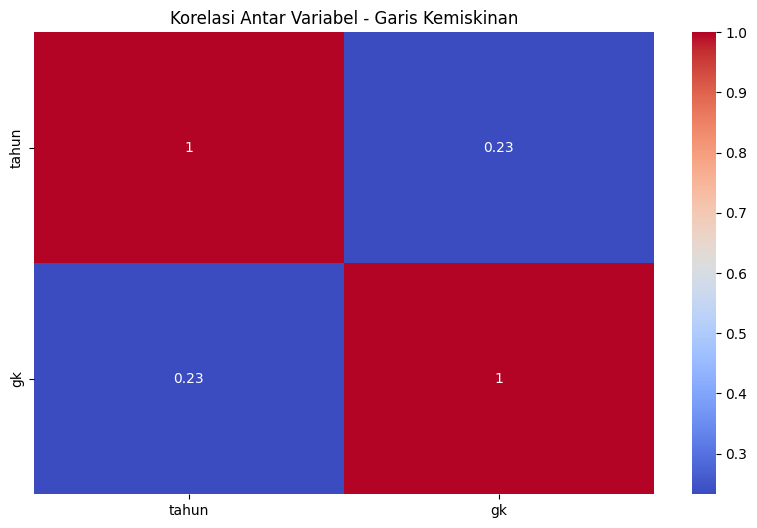

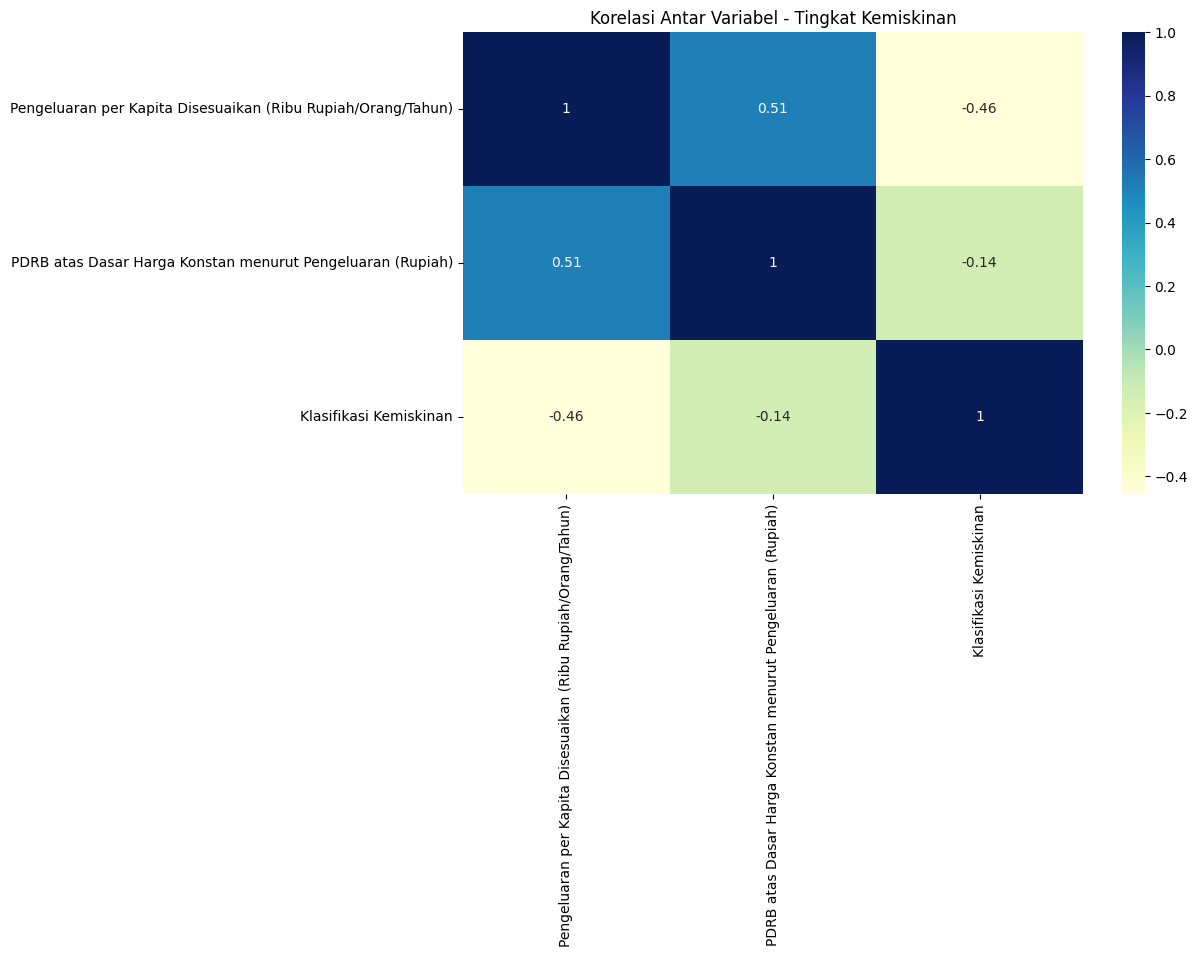

In [ ]:
# Heatmap korelasi Garis Kemiskinan
plt.figure(figsize=(10,6))
sns.heatmap(df_garis.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel - Garis Kemiskinan')
plt.show()

# Heatmap korelasi Tingkat Kemiskinan
plt.figure(figsize=(10,6))
sns.heatmap(df_tingkat.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Korelasi Antar Variabel - Tingkat Kemiskinan')
plt.show()


6. memvisualisasikan datasheet

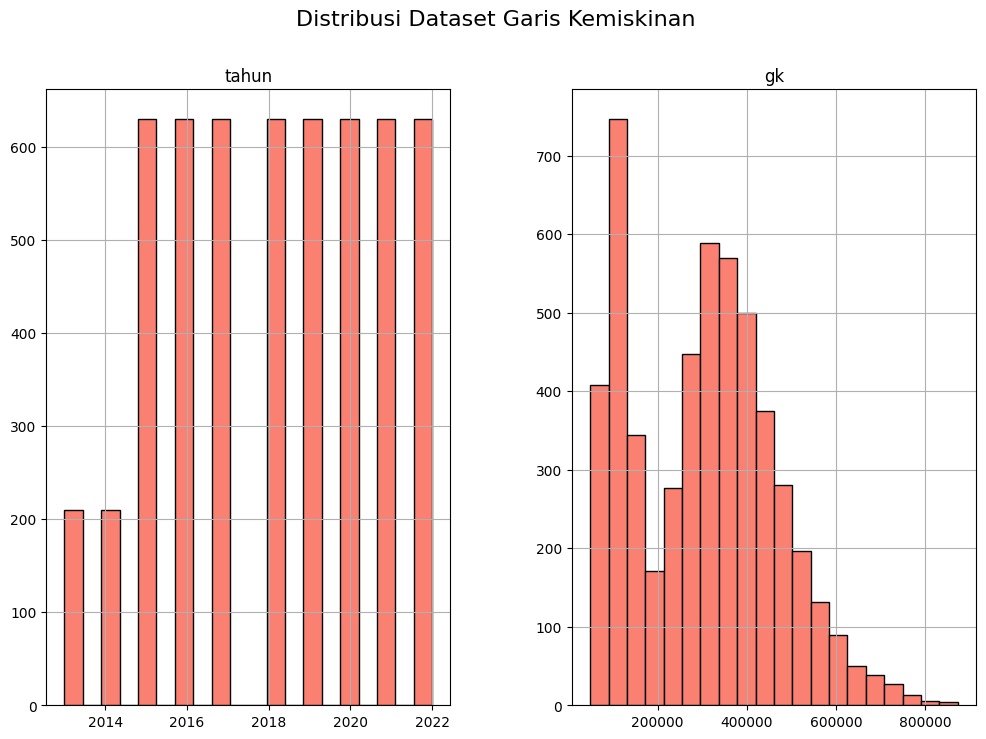

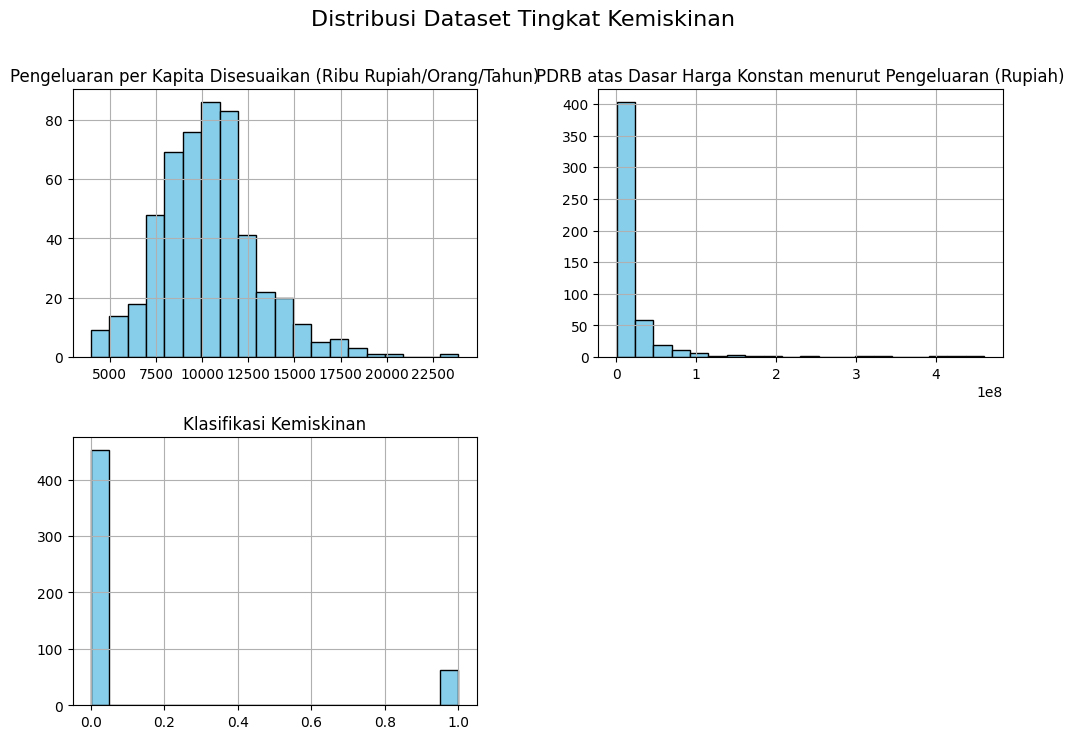

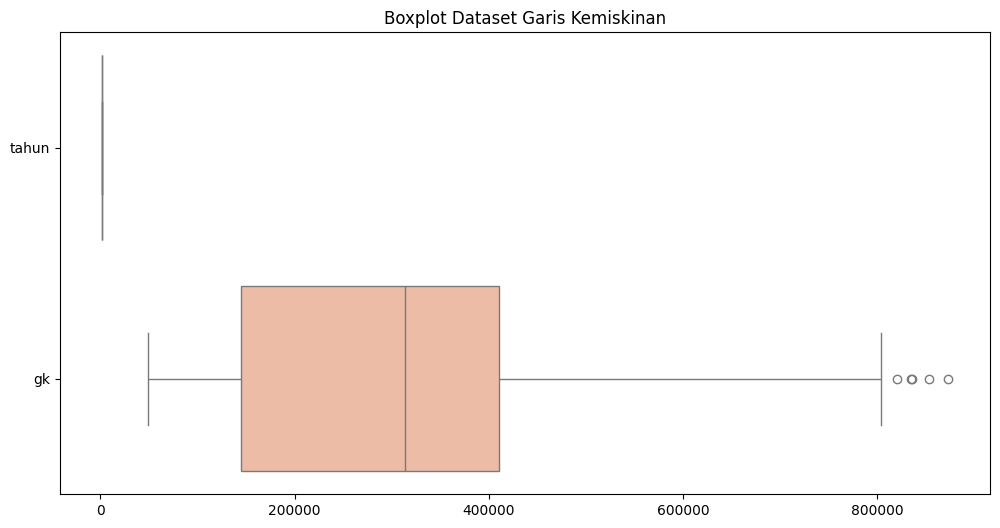

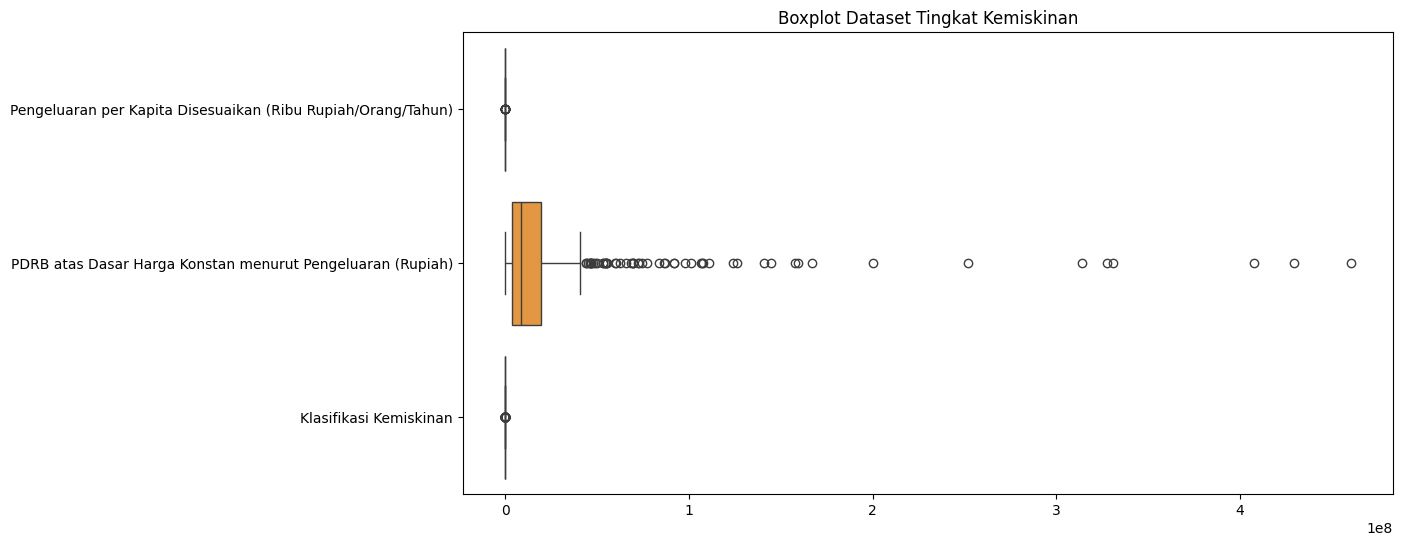

In [ ]:
# Histogram
df_garis.hist(figsize=(12,8), bins=20, color='salmon', edgecolor='black')
plt.suptitle('Distribusi Dataset Garis Kemiskinan', fontsize=16)
plt.show()

df_tingkat.hist(figsize=(12,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Dataset Tingkat Kemiskinan', fontsize=16)
plt.show()

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_garis, orient='h', palette='coolwarm')
plt.title('Boxplot Dataset Garis Kemiskinan')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_tingkat, orient='h', palette='YlOrBr')
plt.title('Boxplot Dataset Tingkat Kemiskinan')
plt.show()


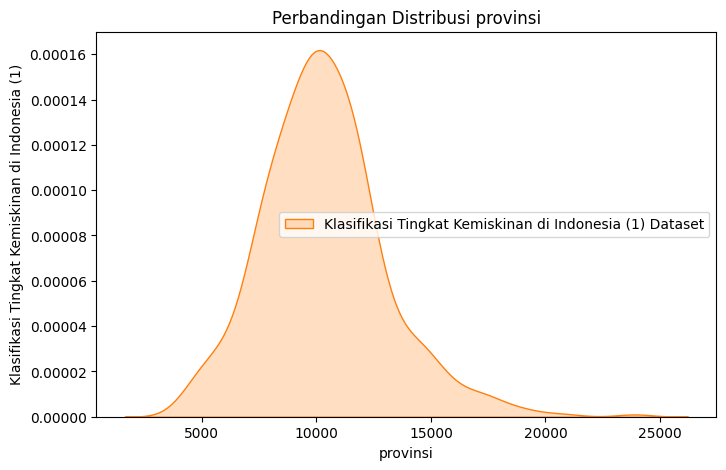

In [ ]:

# Pastikan kolom numerik
df_garis['periode'] = pd.to_numeric(df_garis['periode'], errors='coerce')
df_tingkat['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'] = pd.to_numeric(df_tingkat['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], errors='coerce')

# Hapus NaN
df_garis = df_garis.dropna(subset=['periode'])
df_tingkat = df_tingkat.dropna(subset=['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'])

# Visualisasi
plt.figure(figsize=(8,5))
sns.kdeplot(df_garis['periode'], label='garisKemiskinan Dataset', fill=True)
sns.kdeplot(df_tingkat['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], label='Klasifikasi Tingkat Kemiskinan di Indonesia (1) Dataset', fill=True)
plt.title('Perbandingan Distribusi provinsi')
plt.xlabel('provinsi')
plt.ylabel('Klasifikasi Tingkat Kemiskinan di Indonesia (1)')
plt.legend()
plt.show()
